In [1]:
# On importe les librairies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preparation et nettoyage des données 

In [2]:
#on importe le fichier 
dispo_alimentaire = pd.read_csv('DisponibiliteAlimentaire_2017.csv',sep=',')

In [3]:
dispo_alimentaire.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [4]:
#on controle si on a pas de valeurs nulles 
print(dispo_alimentaire.isnull().sum())

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64


In [5]:
# on importe le deuxieme fichier 
population=pd.read_csv('Population_2000_2018.csv',sep=',')

In [6]:
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [7]:
# on regarde s'il y a des valeurs nulles 
print(population.isnull().sum())

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64


In [8]:
# on enleve les colonnes qui ne sont pas utiles 
dispo_alimentaire.drop(columns=['Code Domaine','Domaine','Code zone','Code Élément','Code Produit','Code année','Symbole','Description du Symbole'],inplace=True)

In [9]:
dispo_alimentaire.head()

,Zone,Élément,Produit,Année,Unité,Valeur
0,Afghanistan,Production,Blé et produits,2017,Milliers de tonnes,4281.0
1,Afghanistan,Importations - Quantité,Blé et produits,2017,Milliers de tonnes,2302.0
2,Afghanistan,Variation de stock,Blé et produits,2017,Milliers de tonnes,-119.0
3,Afghanistan,Exportations - Quantité,Blé et produits,2017,Milliers de tonnes,0.0
4,Afghanistan,Disponibilité intérieure,Blé et produits,2017,Milliers de tonnes,6701.0


In [11]:
#importation de volaille pour chaque pays 
import_volaille=dispo_alimentaire.loc[dispo_alimentaire['Élément']=='Importations - Quantité'].loc[dispo_alimentaire.Produit=='Viande de Volailles'].reset_index()

In [12]:
#on enleve les colonnes dont on a pas l'utilité 
import_volaille.drop(columns=['Élément','Produit','Année','Unité','index'],inplace=True)
#on renomme la colonne pour une meilleure lisibilité
import_volaille.rename(columns={'Valeur':'Import'},inplace=True)


In [13]:
import_volaille.head()

,Zone,Import
0,Afghanistan,29.0
1,Afrique du Sud,514.0
2,Albanie,38.0
3,Algérie,2.0
4,Allemagne,842.0


In [14]:
#production de volaille pour chaque pays 
prod_volaille=dispo_alimentaire.loc[dispo_alimentaire['Élément']=='Production'].loc[dispo_alimentaire.Produit=='Viande de Volailles'].reset_index()

In [15]:
# on retire les colonnes inutiles 
prod_volaille.drop(columns=['Élément','Produit','Année','Unité','index'],inplace=True)
#on renomme la colonne pour une meilleure lisibilité 
prod_volaille.rename(columns={'Valeur':'prod'},inplace=True)


In [16]:
prod_volaille.head()

,Zone,prod
0,Afghanistan,28.0
1,Afrique du Sud,1667.0
2,Albanie,13.0
3,Algérie,275.0
4,Allemagne,1514.0


In [17]:
#disponibilité interieure pour chauque pays 
dispo_int_volaille=dispo_alimentaire.loc[dispo_alimentaire['Élément']=='Disponibilité intérieure'].loc[dispo_alimentaire.Produit=='Viande de Volailles'].reset_index()

In [18]:
#on retire les colonnes inutiles 
dispo_int_volaille.drop(columns=['Élément','Produit','Année','Unité','index'],inplace=True)
#on renomme la colonne pour une meilleure lisibilité 
dispo_int_volaille.rename(columns={'Valeur':'dispo_int'},inplace=True)


In [19]:
dispo_int_volaille.head()

,Zone,dispo_int
0,Afghanistan,57.0
1,Afrique du Sud,2118.0
2,Albanie,47.0
3,Algérie,277.0
4,Allemagne,1739.0


In [20]:
#  quantité viande de volaille  disponible pour chaque pays 
nourriture=dispo_alimentaire.loc[dispo_alimentaire['Élément']=='Nourriture'].loc[dispo_alimentaire.Produit=='Viande de Volailles'].reset_index()

In [21]:
#on enleve les colonnes inutiles 
nourriture.drop(columns=['Élément','index'],inplace=True)
#on renomme la colonne pour une meilleure lisibilité 
nourriture.rename(columns={'Valeur':'nourriture'},inplace=True)


In [22]:
nourriture.head()

,Zone,Produit,Année,Unité,nourriture
0,Afghanistan,Viande de Volailles,2017,Milliers de tonnes,55.0
1,Afrique du Sud,Viande de Volailles,2017,Milliers de tonnes,2035.0
2,Albanie,Viande de Volailles,2017,Milliers de tonnes,47.0
3,Algérie,Viande de Volailles,2017,Milliers de tonnes,264.0
4,Allemagne,Viande de Volailles,2017,Milliers de tonnes,1609.0


In [23]:
# on regroupe dans un DF 'volaille' tous les critéres utiles liés à la volaille 
volaille=import_volaille.merge(prod_volaille,on='Zone',how='inner').merge(dispo_int_volaille,on='Zone',how='inner').merge(nourriture,on='Zone',how='inner')

In [24]:
volaille.head()

,Zone,Import,prod,dispo_int,Produit,Année,Unité,nourriture
0,Afghanistan,29.0,28.0,57.0,Viande de Volailles,2017,Milliers de tonnes,55.0
1,Afrique du Sud,514.0,1667.0,2118.0,Viande de Volailles,2017,Milliers de tonnes,2035.0
2,Albanie,38.0,13.0,47.0,Viande de Volailles,2017,Milliers de tonnes,47.0
3,Algérie,2.0,275.0,277.0,Viande de Volailles,2017,Milliers de tonnes,264.0
4,Allemagne,842.0,1514.0,1739.0,Viande de Volailles,2017,Milliers de tonnes,1609.0


In [25]:
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [26]:
# on affiche les colonnes du DF
population.columns

Index(['Code Domaine', 'Domaine', 'Code zone', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole', 'Note'],
      dtype='object')

In [27]:
# on supprime les colonnes inutiles 
population.drop(columns=['Code Domaine', 'Domaine', 'Code zone','Code Élément','Code Produit', 'Produit', 'Code année', 'Symbole', 'Description du Symbole', 'Note'],inplace=True)

In [28]:
population.head()

,Zone,Élément,Année,Unité,Valeur
0,Afghanistan,Population totale,2000,1000 personnes,20779.953
1,Afghanistan,Population totale,2001,1000 personnes,21606.988
2,Afghanistan,Population totale,2002,1000 personnes,22600.770
3,Afghanistan,Population totale,2003,1000 personnes,23680.871
4,Afghanistan,Population totale,2004,1000 personnes,24726.684


In [29]:
# on créer un colonne afin d'avoir la population totale 
population.insert(4,'population_totale',population.Valeur*1000,True)

In [30]:
population.head()

,Zone,Élément,Année,Unité,population_totale,Valeur
0,Afghanistan,Population totale,2000,1000 personnes,20779953.0,20779.953
1,Afghanistan,Population totale,2001,1000 personnes,21606988.0,21606.988
2,Afghanistan,Population totale,2002,1000 personnes,22600770.0,22600.770
3,Afghanistan,Population totale,2003,1000 personnes,23680871.0,23680.871
4,Afghanistan,Population totale,2004,1000 personnes,24726684.0,24726.684


In [31]:
#on supprime les colonnes inutiles 
population.drop(columns=['Unité','Valeur'],inplace=True)

In [32]:
population.head()

,Zone,Élément,Année,population_totale
0,Afghanistan,Population totale,2000,20779953.0
1,Afghanistan,Population totale,2001,21606988.0
2,Afghanistan,Population totale,2002,22600770.0
3,Afghanistan,Population totale,2003,23680871.0
4,Afghanistan,Population totale,2004,24726684.0


In [33]:
# on garde que les données des pays pour l'année 2017 afin de correspondre avec le DF volaille
pop_2017=population.loc[population.Année==2017].reset_index()

In [34]:
pop_2017.head()

,index,Zone,Élément,Année,population_totale
0,17,Afghanistan,Population totale,2017,36296113.0
1,36,Afrique du Sud,Population totale,2017,57009756.0
2,55,Albanie,Population totale,2017,2884169.0
3,74,Algérie,Population totale,2017,41389189.0
4,93,Allemagne,Population totale,2017,82658409.0


In [35]:
#on regroupe les données de la population pour l'année 2016 pour notre prochain calcule
pop_2016=population.loc[population.Année==2016].reset_index()

In [36]:
pop_2016.head()

,index,Zone,Élément,Année,population_totale
0,16,Afghanistan,Population totale,2016,35383032.0
1,35,Afrique du Sud,Population totale,2016,56207646.0
2,54,Albanie,Population totale,2016,2886438.0
3,73,Algérie,Population totale,2016,40551392.0
4,92,Allemagne,Population totale,2016,82193768.0


In [37]:
#grace à pop 2017 et pop 2016 on peut calculer la croissance de la population 
pop_2017.insert(4,'croissance_pop',(pop_2017.population_totale-pop_2016.population_totale)/(pop_2016.population_totale)*100)

In [38]:
pop_2017.head()

,index,Zone,Élément,Année,croissance_pop,population_totale
0,17,Afghanistan,Population totale,2017,2.580562,36296113.0
1,36,Afrique du Sud,Population totale,2017,1.427048,57009756.0
2,55,Albanie,Population totale,2017,-0.078609,2884169.0
3,74,Algérie,Population totale,2017,2.066013,41389189.0
4,93,Allemagne,Population totale,2017,0.565300,82658409.0


In [39]:
# on supprime les colonnes inutiles 
pop_2017.drop(columns=['Élément','Année','index'],inplace=True)

In [40]:
pop_2017.head()

,Zone,croissance_pop,population_totale
0,Afghanistan,2.580562,36296113.0
1,Afrique du Sud,1.427048,57009756.0
2,Albanie,-0.078609,2884169.0
3,Algérie,2.066013,41389189.0
4,Allemagne,0.565300,82658409.0


In [41]:
# on fait une fusion entre la population et les données sur les volailles 
df=volaille.merge(pop_2017,on='Zone',how='inner')

In [42]:
df.head()

,Zone,Import,prod,dispo_int,Produit,Année,Unité,nourriture,croissance_pop,population_totale
0,Afghanistan,29.0,28.0,57.0,Viande de Volailles,2017,Milliers de tonnes,55.0,2.580562,36296113.0
1,Afrique du Sud,514.0,1667.0,2118.0,Viande de Volailles,2017,Milliers de tonnes,2035.0,1.427048,57009756.0
2,Albanie,38.0,13.0,47.0,Viande de Volailles,2017,Milliers de tonnes,47.0,-0.078609,2884169.0
3,Algérie,2.0,275.0,277.0,Viande de Volailles,2017,Milliers de tonnes,264.0,2.066013,41389189.0
4,Allemagne,842.0,1514.0,1739.0,Viande de Volailles,2017,Milliers de tonnes,1609.0,0.565300,82658409.0


In [43]:
#on retire les colonnes inutiles 
df.drop(columns=['Produit','Année','Unité'],inplace=True)

In [44]:
df.head()

,Zone,Import,prod,dispo_int,nourriture,croissance_pop,population_totale
0,Afghanistan,29.0,28.0,57.0,55.0,2.580562,36296113.0
1,Afrique du Sud,514.0,1667.0,2118.0,2035.0,1.427048,57009756.0
2,Albanie,38.0,13.0,47.0,47.0,-0.078609,2884169.0
3,Algérie,2.0,275.0,277.0,264.0,2.066013,41389189.0
4,Allemagne,842.0,1514.0,1739.0,1609.0,0.565300,82658409.0


In [45]:
# on fait une mise à l'index de la colonne zone pour une meilleure visibilité des données 
df= df.set_index('Zone')

In [46]:
df.head()

,Import,prod,dispo_int,nourriture,croissance_pop,population_totale
Zone,,,,,,
Afghanistan,29.0,28.0,57.0,55.0,2.580562,36296113.0
Afrique du Sud,514.0,1667.0,2118.0,2035.0,1.427048,57009756.0
Albanie,38.0,13.0,47.0,47.0,-0.078609,2884169.0
Algérie,2.0,275.0,277.0,264.0,2.066013,41389189.0
Allemagne,842.0,1514.0,1739.0,1609.0,0.565300,82658409.0


# PREPARATION ACP

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from matplotlib.collections import LineCollection

import seaborn as sns

In [48]:
# data split:on sépare notre matrice de mots,de la matrice des données qu'on appelle X 
X = df.values
X[:5]
 

array([[ 2.90000000e+01,  2.80000000e+01,  5.70000000e+01,
         5.50000000e+01,  2.58056178e+00,  3.62961130e+07],
       [ 5.14000000e+02,  1.66700000e+03,  2.11800000e+03,
         2.03500000e+03,  1.42704784e+00,  5.70097560e+07],
       [ 3.80000000e+01,  1.30000000e+01,  4.70000000e+01,
         4.70000000e+01, -7.86089984e-02,  2.88416900e+06],
       [ 2.00000000e+00,  2.75000000e+02,  2.77000000e+02,
         2.64000000e+02,  2.06601293e+00,  4.13891890e+07],
       [ 8.42000000e+02,  1.51400000e+03,  1.73900000e+03,
         1.60900000e+03,  5.65299549e-01,  8.26584090e+07]])

In [49]:
type(X)

numpy.ndarray

In [50]:
X.shape

(168, 6)

In [51]:
# on enregistre le nom des pays dans une variable names 
names = df.index
names

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Turkménistan', 'Turquie', 'Ukraine', 'Uruguay', 'Vanuatu',
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen', 'Zambie',
       'Zimbabwe'],
      dtype='object', name='Zone', length=168)

In [52]:
#on enregistre les colonnes dans une variable features 
features = df.columns
features

Index(['Import', 'prod', 'dispo_int', 'nourriture', 'croissance_pop',
       'population_totale'],
      dtype='object')

# ACP

In [53]:
# SCALING on commence par scaler les données 
#Standardisez les caractéristiques en supprimant la moyenne et en mettant à l'échelle la variance unitaire.
scaler = StandardScaler()

In [54]:
#on fit
scaler.fit(X)

StandardScaler()

In [55]:
#on transforme
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-0.32889568, -0.27954697, -0.29131835, -0.28473157,  1.19744193,
        -0.04746735],
       [ 2.26458347,  0.37762994,  0.64874126,  0.63976778,  0.16327603,
         0.08675199],
       [-0.28076926, -0.2855614 , -0.29587953, -0.28846692, -1.1865984 ,
        -0.26396858],
       [-0.47327493, -0.18050933, -0.19097235, -0.18714553,  0.73613075,
        -0.01446547],
       [ 4.01852401,  0.31628274,  0.47587246,  0.44086034, -0.60931169,
         0.25294899]])

In [56]:
#on verifie que la moyenne=0 et ecart_type = 1 
#La standardisation d'un ensemble de données est une exigence commune pour de nombreux estimateurs d'apprentissage automatique
# ils peuvent mal se comporter si les caractéristiques individuelles ne ressemblent pas  à des données standard normalement distribuées
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5
mean,0.0,0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


### Determiner le bon nombre de composantes 

In [57]:
# on travail sur les 6 composantes du dataset 
n_components = 6

In [58]:
#on instancie notre ACP
pca = PCA(n_components=n_components)

In [59]:
# on l'entraine sur notre dataset scalé
#variance captée par chaque nouvelle composante 
#on l'enregistre dans une variable
#on fait ensuite une somme cumulée
#on defini une variable avec la liste des composantes
#on l'affiche de maniere graphique
pca.fit(X_scaled)

PCA(n_components=6)

In [60]:
#variance captée par chaque nouvelle composante 
pca.explained_variance_ratio_

array([5.97838848e-01, 1.75818310e-01, 1.43494976e-01, 8.12077573e-02,
       1.48130286e-03, 1.58806081e-04])

In [61]:
#on l'enregistre dans une variable 
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([5.978e+01, 1.758e+01, 1.435e+01, 8.120e+00, 1.500e-01, 2.000e-02])

In [62]:
#on fait ensuite une somme cumulée 
scree_cum = scree.cumsum().round()
scree_cum

array([ 60.,  77.,  92., 100., 100., 100.])

In [63]:
#on defini une variable avec la liste des composantes 
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

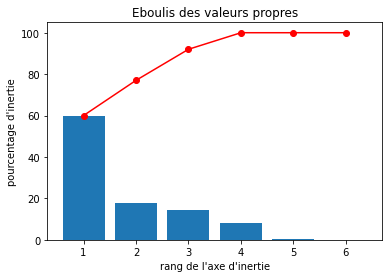

In [64]:
#on l'affiche de maniere graphique,On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée. 
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [65]:
# on s'interesse a nos composantes qu'on obtient par un calcule
# la formule de ce calcule est donnée par l'attribut "components-" que l'on stock dans "pcs"
pcs = pca.components_
pcs

array([[ 1.70573735e-01,  5.10657297e-01,  5.21452174e-01,
         5.19509019e-01, -8.61449377e-02,  4.01136867e-01],
       [ 5.72163391e-01, -7.88413854e-02, -5.76320721e-02,
        -5.42071125e-02, -7.94833412e-01, -1.68502436e-01],
       [ 7.98755671e-01, -9.54263386e-02, -2.70882384e-02,
        -2.80605671e-02,  5.92440773e-01, -1.93895663e-02],
       [ 4.40932025e-02, -3.02510020e-01, -1.94998159e-01,
        -2.30765435e-01, -9.86465435e-02,  8.97516222e-01],
       [ 5.97959436e-02,  7.95164622e-01, -4.08617064e-01,
        -4.39216323e-01,  1.00838394e-02,  6.44755881e-02],
       [-1.80785992e-03, -1.03868443e-02,  7.20444457e-01,
        -6.92979732e-01,  6.28499151e-05, -2.50542961e-02]])

In [66]:
# on transforme en format dataframe 
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5
0,0.170574,0.510657,0.521452,0.519509,-0.086145,0.401137
1,0.572163,-0.078841,-0.057632,-0.054207,-0.794833,-0.168502
2,0.798756,-0.095426,-0.027088,-0.028061,0.592441,-0.019390
3,0.044093,-0.302510,-0.194998,-0.230765,-0.098647,0.897516
4,0.059796,0.795165,-0.408617,-0.439216,0.010084,0.064476
5,-0.001808,-0.010387,0.720444,-0.692980,0.000063,-0.025054


In [67]:
features

Index(['Import', 'prod', 'dispo_int', 'nourriture', 'croissance_pop',
       'population_totale'],
      dtype='object')

In [68]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Import,prod,dispo_int,nourriture,croissance_pop,population_totale
F1,0.17,0.51,0.52,0.52,-0.09,0.40
F2,0.57,-0.08,-0.06,-0.05,-0.79,-0.17
F3,0.80,-0.10,-0.03,-0.03,0.59,-0.02
F4,0.04,-0.30,-0.19,-0.23,-0.10,0.90
F5,0.06,0.80,-0.41,-0.44,0.01,0.06
F6,-0.00,-0.01,0.72,-0.69,0.00,-0.03


<AxesSubplot:>

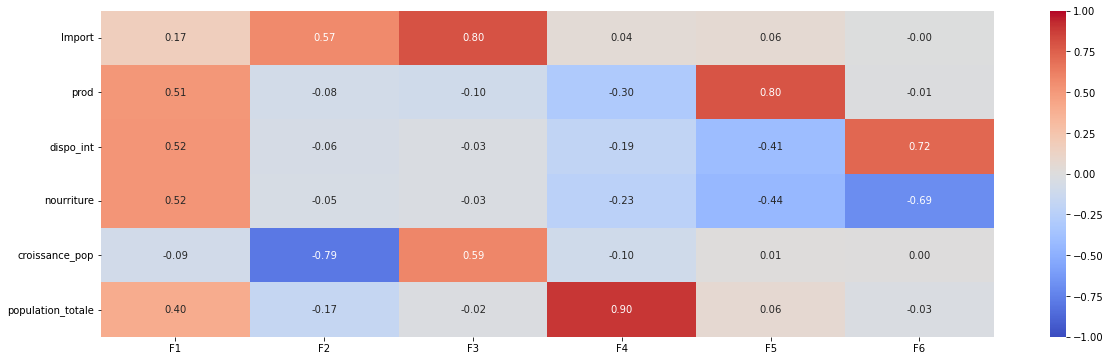

In [69]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

### CERCLES DE CORRELATION 

In [70]:
#on definis  nos axes x et y. Nous allons utiliser les 2 premières composantes
x, y = 0,1

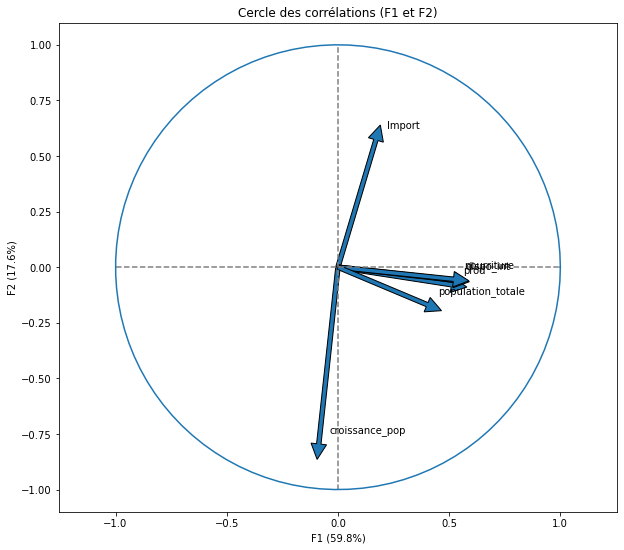

In [71]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  
             pca.components_[0, i],  
             pca.components_[1, i],  
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  
plt.axis('equal')
plt.show(block=False)
#import semble corrélé à 60%avec F2 
# nourriture et production semblent corrérlés à plus de 50% à F1 

In [72]:
x, y = 2,3

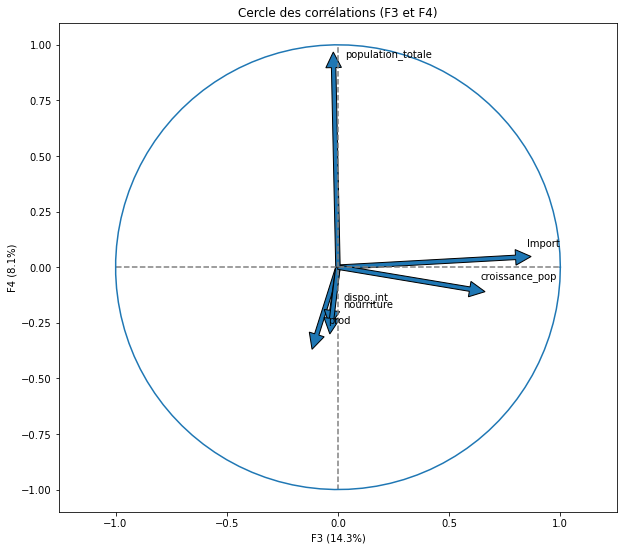

In [73]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  
             pca.components_[x, i], 
             pca.components_[y, i],  
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[x, i] + 0.05,
             pca.components_[y, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  
plt.axis('equal')
plt.show(block=False)
#F4 fortement corrélé à pop total
#F3 fortement corrélé à import et croissance pop

### PROJECTION

In [74]:
# On travail sur la projection de nos dimensions 
#on calcule les coordonnées de nos individus dans le nouvel espace 
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-0.62087733, -1.07768693,  0.49018368,  0.03185021,  0.01115824,
        -0.00780275],
       [ 1.27050463,  1.04947546,  1.83233683, -0.22676904, -0.10315249,
         0.01385626],
       [-0.50153215,  0.88218468, -0.8787776 ,  0.07840707, -0.02524138,
        -0.0032504 ],
       [-0.43892998, -0.81807208,  0.08601317,  0.0285639 , -0.00511227,
        -0.00475769],
       [ 1.47809867,  2.66467164,  2.78849014,  0.17411363,  0.11387045,
         0.02040653]])

In [75]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
     # Transforme X_projected en un df
    X_ = pd.DataFrame(X_projected)
    
    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # On définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # On rajoute la color, les clusters et les labels à X_
    X_["clusters"] =  clusters if clusters is not None else "None" 
    X_["labels"] =  labels if labels is not None else "None"
    c_unique_list = X_["clusters"].sort_values().unique()
    c_dict = {j:i+1 for i, j in enumerate(c_unique_list)}
    X_["colors"] = X_["clusters"].apply(lambda i : c_dict[i])

    # Pour chaque couleur / cluster
    for c in sorted(X_.clusters.unique()) : 
        # On selectionne le sous DF
        sub_X =X_.loc[X_.clusters == c, : ]

        # Clusters and color
        cluster = sub_X.clusters.iloc[0]
        color = sub_X.colors.iloc[0]

        # On affiche les points
        ax.scatter(    sub_X.iloc[:, x], 
                        sub_X.iloc[:, y], 
                        alpha=alpha, 
                        label = cluster ,
                        cmap="Set1", 
                        marker=marker)
        
    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_.iloc[:, x]).max() *1.1
    y_max = np.abs(X_.iloc[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if labels : 
        
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y, labels[i], fontsize='14', ha='center',va='center') 

    # Titre, legend et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    if clusters is not None: 
        plt.legend()
    plt.show()

In [76]:
x_y=0,1

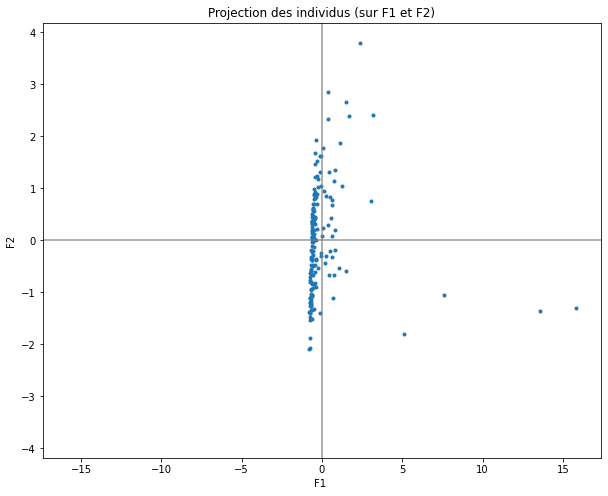

In [77]:
display_factorial_planes(X_proj,x_y) 
                                

In [78]:
x_y=2,3

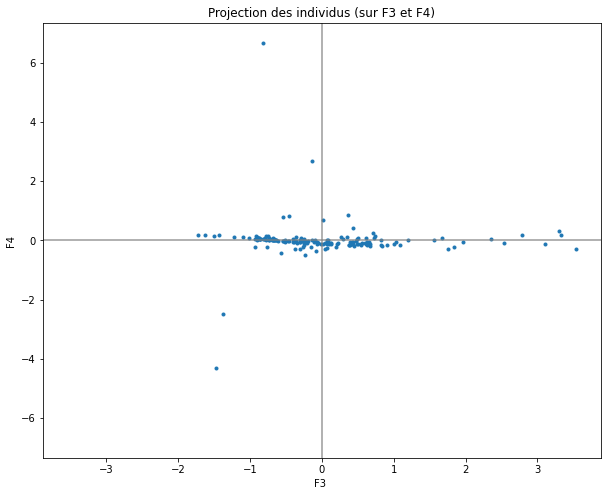

In [79]:
display_factorial_planes(X_proj,x_y) 

# Clustering

## Methode K-means

### Déterminer le nombre de cluster 

In [80]:
# mise en place des librairies  
from sklearn import datasets
from sklearn.cluster import KMeans

In [81]:
df.head()

,Import,prod,dispo_int,nourriture,croissance_pop,population_totale
Zone,,,,,,
Afghanistan,29.0,28.0,57.0,55.0,2.580562,36296113.0
Afrique du Sud,514.0,1667.0,2118.0,2035.0,1.427048,57009756.0
Albanie,38.0,13.0,47.0,47.0,-0.078609,2884169.0
Algérie,2.0,275.0,277.0,264.0,2.066013,41389189.0
Allemagne,842.0,1514.0,1739.0,1609.0,0.565300,82658409.0


In [82]:
# on defini une liste vide pour stocker nos inerties 
inertia_list = [ ]

In [83]:
# on defini le nombre de cluster que l'on veut tester
#L'algorithme du k-means converge rapidement : il n'est pas rare qu'il atteigne la convergence au bout de 10 itérations.
k_list = range(1, 11)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [84]:
# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(X)
    
    # On enregistre l'inertie obtenue : 
    inertia_list.append(kmeans.inertia_)

C:\Users\samir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [85]:
inertia_list

[4.0012163856032604e+18,
 3.871833031693119e+17,
 1.1717595635215318e+17,
 5.676657809664189e+16,
 3.2814225738337276e+16,
 2.0920905655695348e+16,
 1.5443310541113202e+16,
 1.152355870041949e+16,
 8173015760822583.0,
 6311054708169407.0]

In [86]:
len(inertia_list)

10

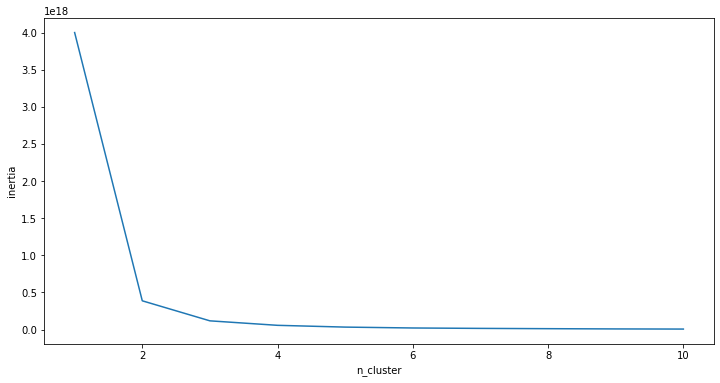

In [87]:
#On affiche en "x" le nombre de clusters,la variable k_list et en "y" la liste des inerties intraclasses,la variable inertia  :
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("inertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, inertia_list)

In [88]:
#on regarde le graphique pour constater la "cassure" dans la courbe: n_clusters=3

In [89]:
#on ré-entraine un estimateur:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [90]:
# voici les clusters 
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0])

In [91]:
# on remplace le numero des clusters par des lettres 
dd = {i:j for i,j in enumerate(list("abc"))}
dd

{0: 'a', 1: 'b', 2: 'c'}

In [92]:
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']

In [93]:
# on ajoute nos clusters à notre DF 
df_clusters=df.copy()
df_clusters['clusters']=labels
df.head()

,Import,prod,dispo_int,nourriture,croissance_pop,population_totale
Zone,,,,,,
Afghanistan,29.0,28.0,57.0,55.0,2.580562,36296113.0
Afrique du Sud,514.0,1667.0,2118.0,2035.0,1.427048,57009756.0
Albanie,38.0,13.0,47.0,47.0,-0.078609,2884169.0
Algérie,2.0,275.0,277.0,264.0,2.066013,41389189.0
Allemagne,842.0,1514.0,1739.0,1609.0,0.565300,82658409.0


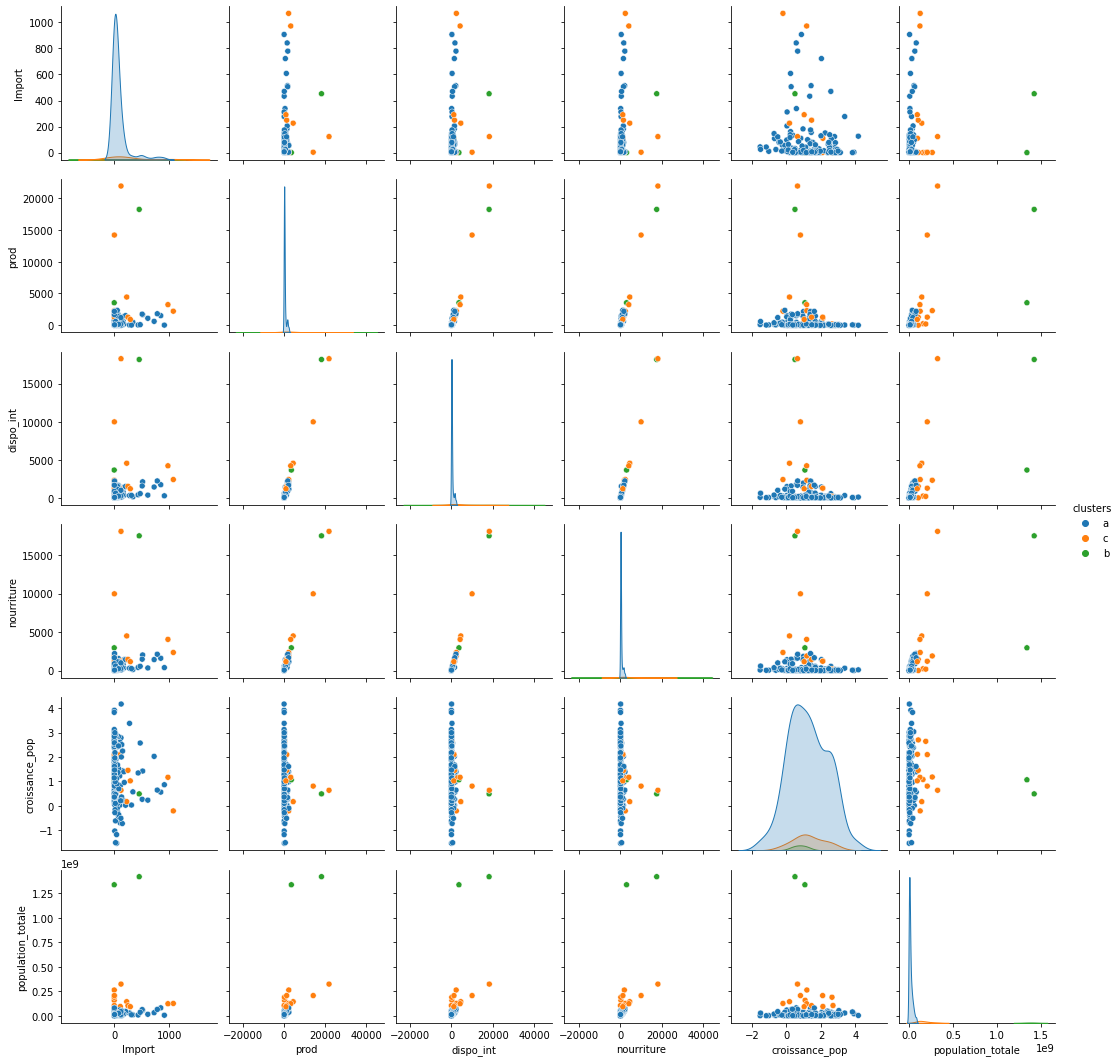

In [94]:
# on l'affiche de maniere graphique 
sns.pairplot(df_clusters, hue="clusters")

# Classification hierarchique

In [95]:
# import de librairie  
from scipy.cluster.hierarchy import dendrogram, linkage

In [96]:
#On calcule les distances en spécifiant la méthode à utiliser
# on utilise la methode ward pourminimiser l'augmentation d'inertie intraclasse due au regroupement des 2 clusters.
Z = linkage(df, method="ward")

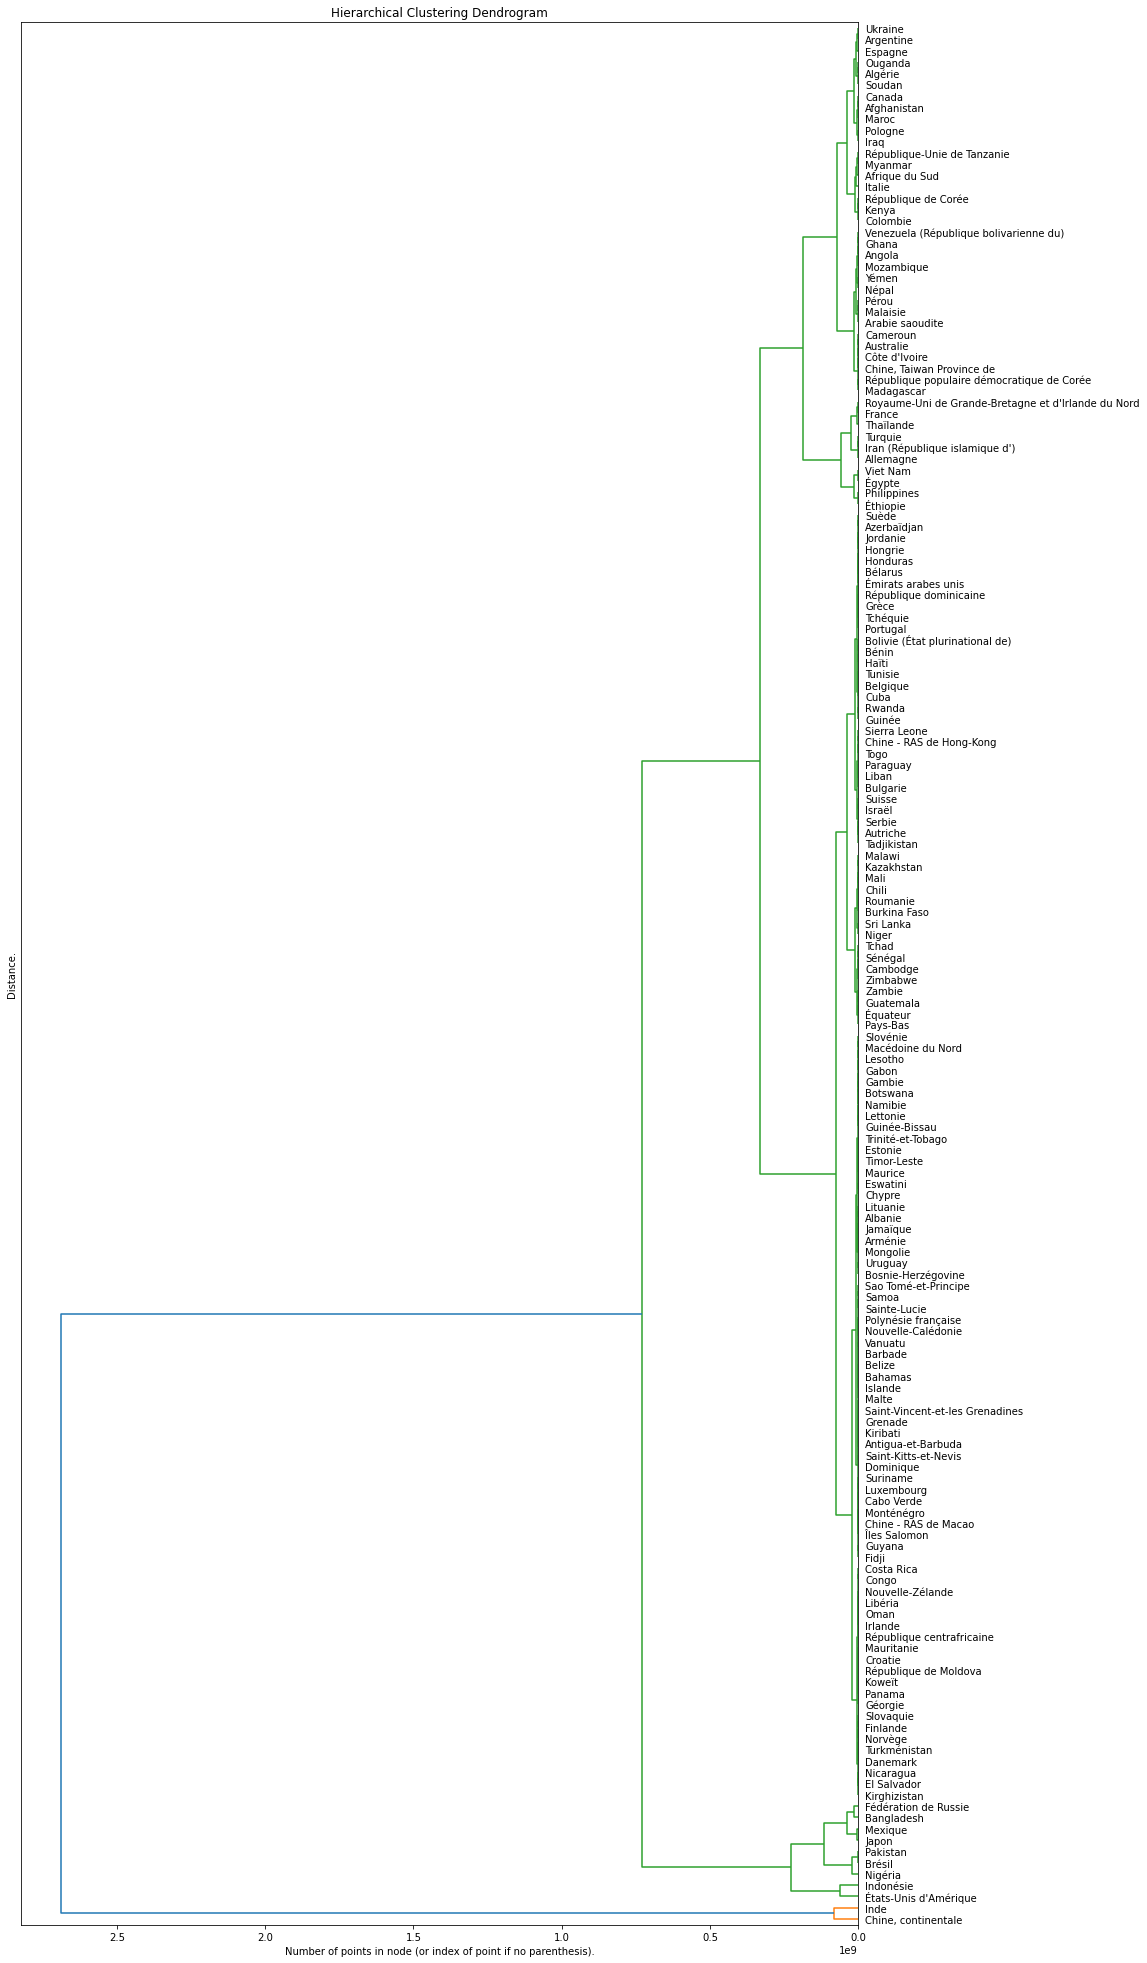

In [97]:
#on peut afficher le dendogramme : l'arbre qui regroupe les différents clusters.
fig, ax = plt.subplots(1, 1, figsize=(15, 35))

_ = dendrogram(Z,labels=df.index, ax=ax,orientation='left',leaf_font_size=10)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

# Synthese de l'analyse 

<AxesSubplot:>

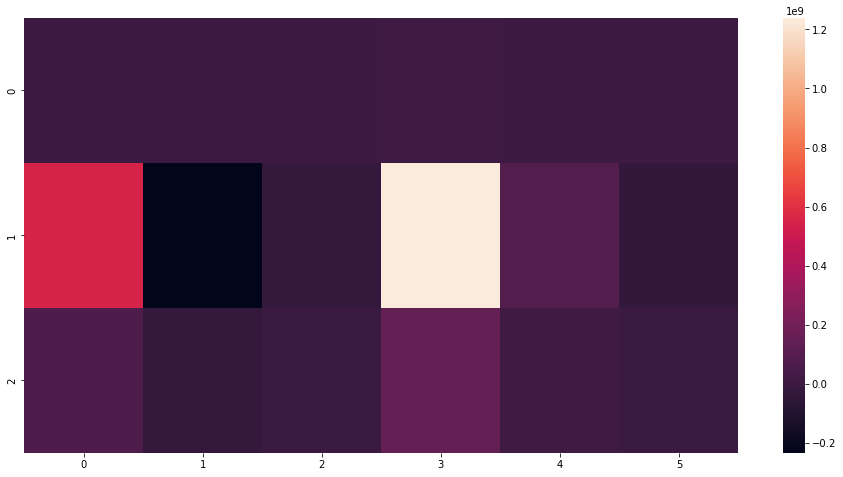

In [98]:
#analyse des centroides 
centroides=kmeans.cluster_centers_
centroides_proj=pca.transform(centroides)
plt.figure(figsize=(16,8))
sns.heatmap(centroides_proj)
#analyse non pertinante à ce stade à cause de la présence d'outliers que sont inde + chine continentale
# le vecteur le plus interessant semble etre F3  mais il n'y a pas assez de difference entre les clusters 

In [170]:
df_clusters.loc[df_clusters.clusters=='b']

,Import,prod,dispo_int,nourriture,croissance_pop,population_totale,clusters
Zone,,,,,,,
"Chine, continentale",452.0,18236.0,18161.0,17518.0,0.493083,1.421022e+09,b
Inde,0.0,3545.0,3661.0,2965.0,1.069034,1.338677e+09,b


## Analyse sans l'inde et la chine 

In [99]:
# nous récupérons le dataframe du debut pour en faire une copie 
df_outlaw=df.copy()

In [100]:
df_outlaw.head()

,Import,prod,dispo_int,nourriture,croissance_pop,population_totale
Zone,,,,,,
Afghanistan,29.0,28.0,57.0,55.0,2.580562,36296113.0
Afrique du Sud,514.0,1667.0,2118.0,2035.0,1.427048,57009756.0
Albanie,38.0,13.0,47.0,47.0,-0.078609,2884169.0
Algérie,2.0,275.0,277.0,264.0,2.066013,41389189.0
Allemagne,842.0,1514.0,1739.0,1609.0,0.565300,82658409.0


In [101]:
# on recupére le premier outlier 
df_outlaw.loc[df_outlaw.index=='Inde']

,Import,prod,dispo_int,nourriture,croissance_pop,population_totale
Zone,,,,,,
Inde,0.0,3545.0,3661.0,2965.0,1.069034,1.338677e+09


In [102]:
#On supprime l'inde 
df_outlaw.drop(index=df_outlaw.loc[df_outlaw.index=='Inde'].index,inplace=True)

In [103]:
# on recupére le 2 eme outlier
df_outlaw.loc[df_outlaw.index=='Chine, continentale']

,Import,prod,dispo_int,nourriture,croissance_pop,population_totale
Zone,,,,,,
"Chine, continentale",452.0,18236.0,18161.0,17518.0,0.493083,1.421022e+09


In [104]:
# on supprime le deuxieme outlier 
df_outlaw.drop(df_outlaw.loc[df_outlaw.index=='Chine, continentale'].index,axis=0,inplace=True)

In [105]:
# On ajoute une nouvelle colonne avec le ration import sur le production afin d'avoir une analyse plus precise 
df_outlaw["ratio_import_prod"]=df_outlaw.Import/df_outlaw["prod"]


In [106]:
df_outlaw.head()

,Import,prod,dispo_int,nourriture,croissance_pop,population_totale,ratio_import_prod
Zone,,,,,,,
Afghanistan,29.0,28.0,57.0,55.0,2.580562,36296113.0,1.035714
Afrique du Sud,514.0,1667.0,2118.0,2035.0,1.427048,57009756.0,0.308338
Albanie,38.0,13.0,47.0,47.0,-0.078609,2884169.0,2.923077
Algérie,2.0,275.0,277.0,264.0,2.066013,41389189.0,0.007273
Allemagne,842.0,1514.0,1739.0,1609.0,0.565300,82658409.0,0.556143


In [107]:
# on regroupe dans un DF les pays pour lesquels il n'y a pas de production et donnant un ratio infini 
df_pays_sans_prod= df_outlaw.loc[df_outlaw.ratio_import_prod==np.inf]
df_pays_sans_prod

,Import,prod,dispo_int,nourriture,croissance_pop,population_totale,ratio_import_prod
Zone,,,,,,,
Antigua-et-Barbuda,7.0,0.0,7.0,5.0,0.951051,95426.0,inf
Dominique,4.0,0.0,4.0,3.0,0.211760,71458.0,inf
Îles Salomon,6.0,0.0,3.0,3.0,2.680010,636039.0,inf
Luxembourg,11.0,0.0,11.0,11.0,2.183115,591910.0,inf
Mongolie,10.0,0.0,9.0,9.0,1.878768,3113786.0,inf
Saint-Kitts-et-Nevis,4.0,0.0,4.0,3.0,0.813559,52045.0,inf
Saint-Vincent-et-les Grenadines,9.0,0.0,8.0,8.0,0.336199,109827.0,inf
Samoa,17.0,0.0,15.0,13.0,0.419976,195352.0,inf


In [108]:
# on supprime les pays qui ont un ratio infini 
df_outlaw.drop(df_outlaw.loc[df_outlaw.ratio_import_prod==np.inf].index,axis=0,inplace=True)

# Preparation ACP 1

In [109]:
# data split on separe les noms et les variables 
X1 = df_outlaw.values
X1[:5]

array([[ 2.90000000e+01,  2.80000000e+01,  5.70000000e+01,
         5.50000000e+01,  2.58056178e+00,  3.62961130e+07,
         1.03571429e+00],
       [ 5.14000000e+02,  1.66700000e+03,  2.11800000e+03,
         2.03500000e+03,  1.42704784e+00,  5.70097560e+07,
         3.08338332e-01],
       [ 3.80000000e+01,  1.30000000e+01,  4.70000000e+01,
         4.70000000e+01, -7.86089984e-02,  2.88416900e+06,
         2.92307692e+00],
       [ 2.00000000e+00,  2.75000000e+02,  2.77000000e+02,
         2.64000000e+02,  2.06601293e+00,  4.13891890e+07,
         7.27272727e-03],
       [ 8.42000000e+02,  1.51400000e+03,  1.73900000e+03,
         1.60900000e+03,  5.65299549e-01,  8.26584090e+07,
         5.56142668e-01]])

In [110]:
type(X1)

numpy.ndarray

In [111]:
X1.shape

(158, 7)

In [112]:
# on enregistre le nom des pays dans une variable names 
names1 = df_outlaw.index
names1

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Arabie saoudite', 'Argentine', 'Arménie', 'Australie',
       ...
       'Turkménistan', 'Turquie', 'Ukraine', 'Uruguay', 'Vanuatu',
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen', 'Zambie',
       'Zimbabwe'],
      dtype='object', name='Zone', length=158)

In [113]:
#on enregistre les colonnes dans une variable features 
features1 = df_outlaw.columns
features1

Index(['Import', 'prod', 'dispo_int', 'nourriture', 'croissance_pop',
       'population_totale', 'ratio_import_prod'],
      dtype='object')

# ACP 1

In [114]:
#Standardisez les caractéristiques en supprimant la moyenne et en mettant à l'échelle la variance unitaire.
# Aprés le scaling on fit les données
scaler.fit(X1)

StandardScaler()

In [115]:
#on transforme
X1_scaled = scaler.transform(X1)
X1_scaled[:5]

array([[-0.3372014 , -0.28257238, -0.30950981, -0.3004984 ,  1.17270699,
         0.15157501, -0.22886328],
       [ 2.22042933,  0.48264569,  0.86262267,  0.83954428,  0.15307744,
         0.57523093, -0.3765928 ],
       [-0.28974021, -0.28957559, -0.31519701, -0.30510463, -1.177823  ,
        -0.53179913,  0.15445866],
       [-0.47958497, -0.16725275, -0.18439135, -0.18016056,  0.71788005,
         0.25574364, -0.437739  ],
       [ 3.95012598,  0.41121289,  0.64707769,  0.59426237, -0.6086507 ,
         1.09982256, -0.32626392]])

In [176]:
#on verifie que la moyenne=0 et ecart_type = 1 
#La standardisation d'un ensemble de données est une exigence commune pour de nombreux estimateurs d'apprentissage automatique
# ils peuvent mal se comporter si les caractéristiques individuelles ne ressemblent pas  à des données standard normalement distribuées

idx = ["mean", "std"]

pd.DataFrame(X1_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6
mean,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Determiner le bon nombre de composantes 

In [116]:
# on travail sur les 7 composantes du dataset
n_components = 7

In [117]:
#on instancie notre ACP
pca1 = PCA(n_components=n_components)

In [118]:
# on l'entraine sur notre dataset scalé
pca1.fit(X1_scaled)

PCA(n_components=7)

In [119]:
#variance captée par chaque nouvelle composante
pca1.explained_variance_ratio_

array([5.26806156e-01, 1.72283527e-01, 1.51024328e-01, 1.01842610e-01,
       4.64606315e-02, 1.36296796e-03, 2.19780119e-04])

In [120]:
#on l'enregistre dans une variable
scree1 = (pca1.explained_variance_ratio_*100).round(2)
scree1

array([5.268e+01, 1.723e+01, 1.510e+01, 1.018e+01, 4.650e+00, 1.400e-01,
       2.000e-02])

In [121]:
#on fait ensuite une somme cumulée
scree1_cum = scree1.cumsum().round()
scree1_cum

array([ 53.,  70.,  85.,  95., 100., 100., 100.])

In [122]:
#on defini une variable avec la liste des composantes
x_list1 = range(1, n_components+1)
list(x_list1)

[1, 2, 3, 4, 5, 6, 7]

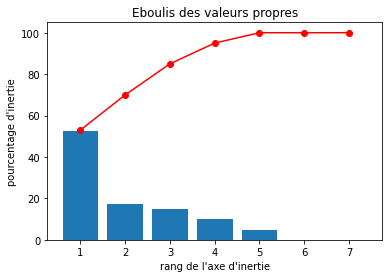

In [123]:
#on l'affiche de maniere graphique,On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.
plt.bar(x_list1, scree1)
plt.plot(x_list1, scree1_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [124]:
# on s'interesse a nos composantes qu'on obtient par un calcule
# la formule de ce calcule est donnée par l'attribut "components-" que l'on stock dans "pcs"
pcs1 = pca1.components_
pcs1

array([[ 1.40085203e-01,  5.05383927e-01,  5.13016933e-01,
         5.12049586e-01, -7.11057298e-02,  4.31776325e-01,
        -8.99736083e-02],
       [ 6.68443941e-01, -3.93308700e-02,  1.10104367e-02,
         1.36171121e-02,  4.61779846e-02, -3.82395441e-02,
         7.40090843e-01],
       [-2.90488403e-01,  4.89135040e-02,  3.77459638e-02,
         3.79802451e-02,  9.18816833e-01,  1.42960809e-01,
         2.13762798e-01],
       [ 6.32554800e-01, -2.11761295e-01, -1.26847934e-01,
        -1.37624134e-01,  3.13161450e-01,  2.86672574e-01,
        -5.82880366e-01],
       [-2.09495763e-01, -2.18899221e-01, -2.07019876e-01,
        -2.17800115e-01, -2.24416032e-01,  8.41955824e-01,
         2.42174259e-01],
       [ 7.17980880e-02,  8.04913733e-01, -4.12349138e-01,
        -4.19756448e-01,  1.24233574e-02,  2.27203531e-02,
        -7.81511427e-03],
       [-2.51119495e-03, -1.34390100e-03,  7.11539317e-01,
        -7.02569945e-01, -4.54730936e-04, -9.06428204e-03,
         4.0977887

In [125]:
# on le transforme en format dataframe 
pcs1 = pd.DataFrame(pcs1)
pcs1

,0,1,2,3,4,5,6
0,0.140085,0.505384,0.513017,0.512050,-0.071106,0.431776,-0.089974
1,0.668444,-0.039331,0.011010,0.013617,0.046178,-0.038240,0.740091
2,-0.290488,0.048914,0.037746,0.037980,0.918817,0.142961,0.213763
3,0.632555,-0.211761,-0.126848,-0.137624,0.313161,0.286673,-0.582880
4,-0.209496,-0.218899,-0.207020,-0.217800,-0.224416,0.841956,0.242174
5,0.071798,0.804914,-0.412349,-0.419756,0.012423,0.022720,-0.007815
6,-0.002511,-0.001344,0.711539,-0.702570,-0.000455,-0.009064,0.004098


In [126]:
features1

Index(['Import', 'prod', 'dispo_int', 'nourriture', 'croissance_pop',
       'population_totale', 'ratio_import_prod'],
      dtype='object')

In [127]:
pcs1.columns = features1
pcs1.index = [f"F{i}" for i in x_list1]
pcs1.round(2)

,Import,prod,dispo_int,nourriture,croissance_pop,population_totale,ratio_import_prod
F1,0.14,0.51,0.51,0.51,-0.07,0.43,-0.09
F2,0.67,-0.04,0.01,0.01,0.05,-0.04,0.74
F3,-0.29,0.05,0.04,0.04,0.92,0.14,0.21
F4,0.63,-0.21,-0.13,-0.14,0.31,0.29,-0.58
F5,-0.21,-0.22,-0.21,-0.22,-0.22,0.84,0.24
F6,0.07,0.80,-0.41,-0.42,0.01,0.02,-0.01
F7,-0.00,-0.00,0.71,-0.70,-0.00,-0.01,0.00


<AxesSubplot:>

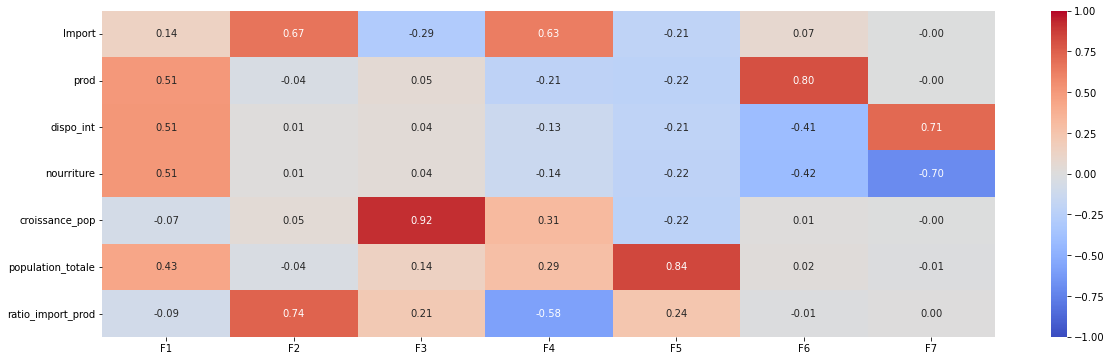

In [128]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs1.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
# verifier la possible correlation lineaire entre les composantes principales et les variables 

## Cercles de correlation 1

In [129]:
#Définissons nos axes x et y. Nous allons utiliser les 2 premières composantes
x1, y1 = 0,1

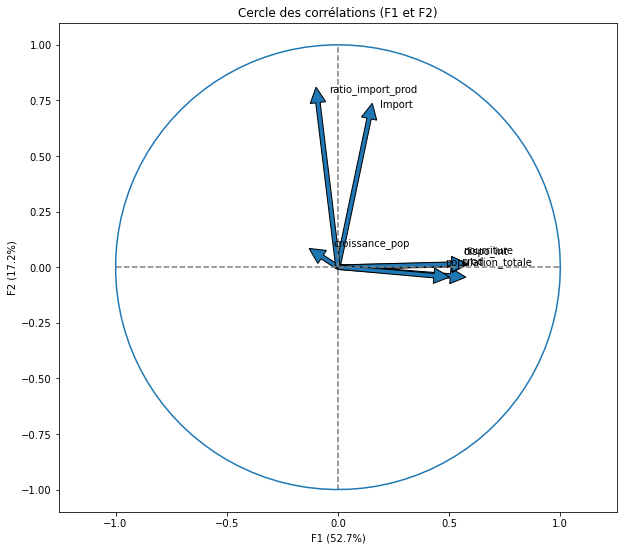

In [130]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca1.components_.shape[1]):
    ax.arrow(0,
             0,  
             pca1.components_[x1, i],  
             pca1.components_[y1, i],  
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca1.components_[x1, i] + 0.05,
             pca1.components_[y1, i] + 0.05,
             features1[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x1+1, round(100*pca1.explained_variance_ratio_[x1],1)))
plt.ylabel('F{} ({}%)'.format(y1+1, round(100*pca1.explained_variance_ratio_[y1],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x1+1, y1+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  
plt.axis('equal')
plt.show(block=False)
#F1 est corrélé à dispo_ interieur et production
#F2 est corrélé à ratio_import_prod et import

In [131]:
x1, y1 = 2,3

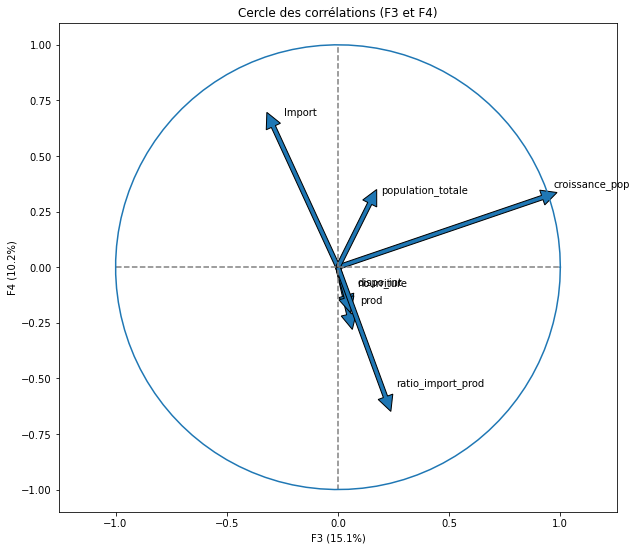

In [132]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca1.components_.shape[1]):
    ax.arrow(0,
             0,  
             pca1.components_[x1, i],  
             pca1.components_[y1, i],  
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca1.components_[x1, i] + 0.05,
             pca1.components_[y1, i] + 0.05,
             features1[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x1+1, round(100*pca1.explained_variance_ratio_[x1],1)))
plt.ylabel('F{} ({}%)'.format(y1+1, round(100*pca1.explained_variance_ratio_[y1],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x1+1, y1+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  
plt.axis('equal')
plt.show(block=False)
#F3 est correlé à la croissance de la population
#F4 est correlé à import 

In [133]:
x1, y1 = 4,5

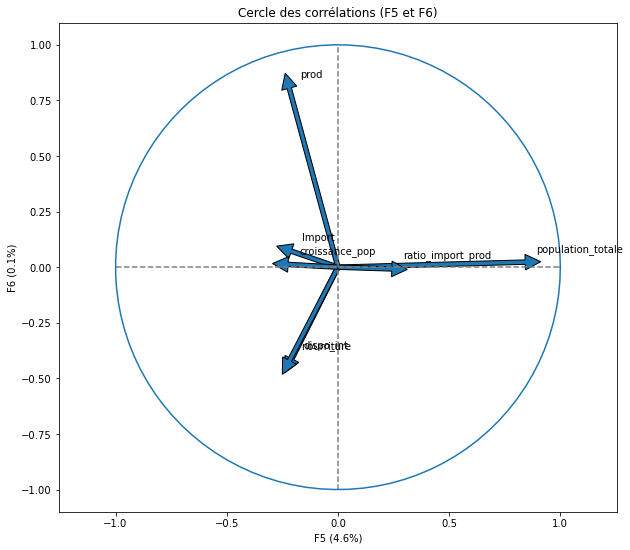

In [134]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca1.components_.shape[1]):
    ax.arrow(0,
             0,  
             pca1.components_[x1, i],  
             pca1.components_[y1, i],  
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca1.components_[x1, i] + 0.05,
             pca1.components_[y1, i] + 0.05,
             features1[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x1+1, round(100*pca1.explained_variance_ratio_[x1],1)))
plt.ylabel('F{} ({}%)'.format(y1+1, round(100*pca1.explained_variance_ratio_[y1],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x1+1, y1+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  
plt.axis('equal')
plt.show(block=False)
#F5 est corrélé à la population totale 
#F6 est corrélé à la production

## PROJECTION 1

In [135]:
# On travail sur la projection de nos dimensions 
#on calcule les coordonnées de nos inividus dans le nouvel espace 
X1_proj = pca1.transform(X1_scaled)
X1_proj[:5]

array([[-5.00046352e-01, -3.42808708e-01,  1.11128550e+00,
         4.71254975e-01,  7.10408204e-02,  2.19068308e-02,
        -1.07257457e-02],
       [ 1.69876883e+00,  1.19253903e+00, -4.14570376e-01,
         1.50972353e+00, -5.73489264e-01, -1.42280817e-01,
         1.08999471e-02],
       [-6.64630789e-01, -1.09651225e-01, -1.07869587e+00,
        -6.51315711e-01,  1.09767987e-01, -2.37676030e-02,
        -2.81205880e-03],
       [-2.39793018e-01, -6.19076854e-01,  7.19919659e-01,
         3.33514503e-01,  1.62706117e-01,  7.49896298e-04,
        -7.63553437e-03],
       [ 1.94493923e+00,  2.32785325e+00, -1.55210720e+00,
         2.56258273e+00, -1.97356932e-01,  1.18311664e-01,
         2.14088798e-02]])

In [136]:
# on definit nos axes x et y. Nous allons utiliser les 2 premières composantes
x_y=0,1

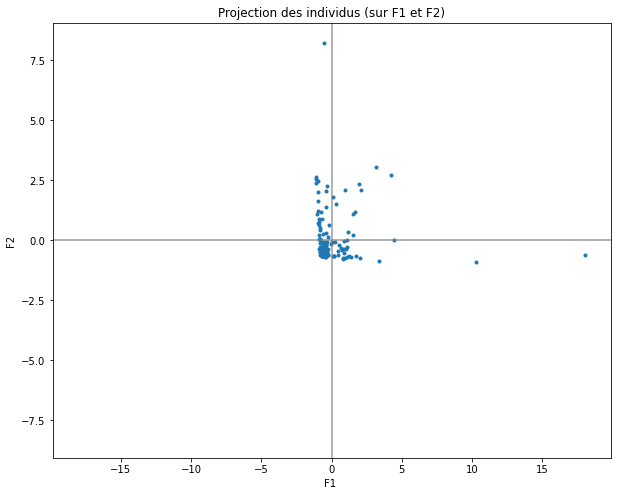

In [137]:
display_factorial_planes(X1_proj,x_y) 

In [138]:
x_y=2,3

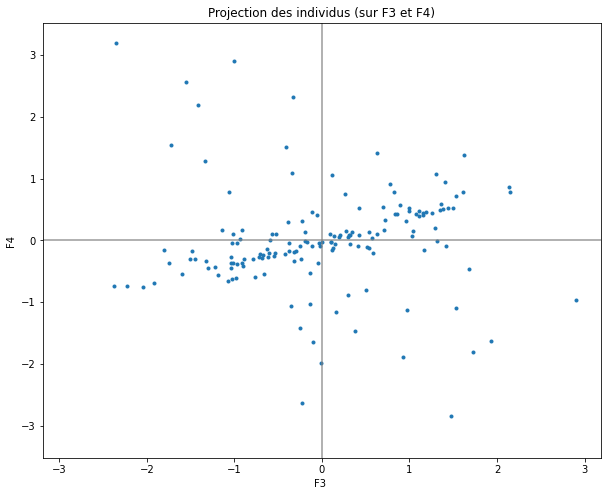

In [139]:
display_factorial_planes(X1_proj,x_y) 

# Clustering 1

## Methode K_means 1

### Determiner le nombre de cluster 

In [140]:
# on defini une liste vide pour stocker nos inerties 
inertia_list1 = [ ]

In [141]:
# on defini le nombre de cluster que l'on veut tester
#L'algorithme du k-means converge rapidement : il n'est pas rare qu'il atteigne la convergence au bout de 10 itérations.
k_list = range(1, 11)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [142]:
# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans1 = KMeans(n_clusters=k)
    
    # On entraine
    kmeans1.fit(X1)
    
    # On enregistre l'inertie obtenue : 
    inertia_list1.append(kmeans1.inertia_)

C:\Users\samir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [143]:
inertia_list1

[3.776969663852839e+17,
 1.118384544038747e+17,
 5.243229963788612e+16,
 2.9125465000506716e+16,
 1.7288332150520054e+16,
 1.2045622910626936e+16,
 7980377361191353.0,
 6154255242420773.0,
 4325190390792488.0,
 3341890427403195.5]

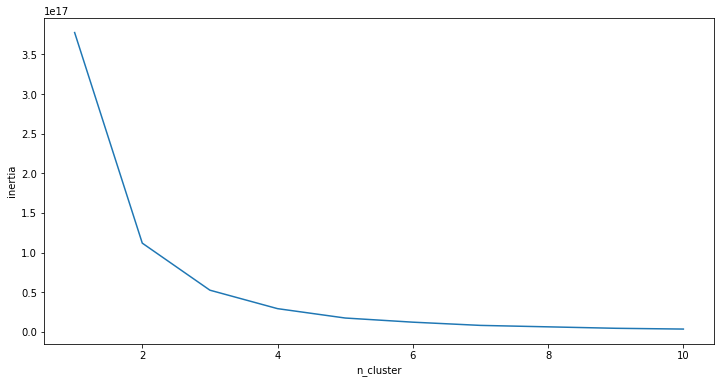

In [144]:
#On affiche en "x" le nombre de clusters,la variable k_list et en "y" la liste des inerties intraclasses,la variable inertia  :
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("inertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, inertia_list1)

In [145]:
#on regarde le graphique pour constater la "cassure" dans la courbe: n_clusters=4

In [146]:
#on ré-entraine un estimateur:
kmeans1 = KMeans(n_clusters=4)
kmeans1.fit(X1)

KMeans(n_clusters=4)

In [147]:
# voici les clusters
kmeans1.labels_

array([0, 0, 2, 0, 3, 0, 0, 0, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 3, 2, 2,
       2, 0, 2, 2, 1, 3, 3, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 3, 0, 2, 2, 2, 0, 2, 3, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 0, 2, 2, 3, 2, 0, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0,
       1, 2, 2, 2, 0, 3, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 3, 0, 2, 2, 0,
       3, 0, 2, 2])

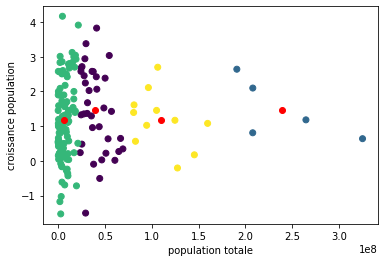

In [169]:
# afficher les centroides 
plt.scatter(X1[:,5],X1[:,4], c= kmeans1.labels_)
plt.scatter(kmeans1.cluster_centers_[:,5],kmeans1.cluster_centers_[:,4],c='r')
plt.xlabel("population totale")
plt.ylabel("croissance population")
plt.show()

In [153]:
#on remplace les numeros des clusters par des lettre 
dd = {i:j for i,j in enumerate(list("abcd"))}
dd

{0: 'a', 1: 'b', 2: 'c', 3: 'd'}

In [154]:
labels = [dd[i] for i in kmeans1.labels_]
labels[:10]

['a', 'a', 'c', 'a', 'd', 'a', 'a', 'a', 'c', 'a']

In [155]:
# on ajoute nos clusters à notre dataframe 
df_clusters1=df_outlaw.copy()
df_clusters1['clusters']=labels
df_clusters1.head()

,Import,prod,dispo_int,nourriture,croissance_pop,population_totale,ratio_import_prod,clusters
Zone,,,,,,,,
Afghanistan,29.0,28.0,57.0,55.0,2.580562,36296113.0,1.035714,a
Afrique du Sud,514.0,1667.0,2118.0,2035.0,1.427048,57009756.0,0.308338,a
Albanie,38.0,13.0,47.0,47.0,-0.078609,2884169.0,2.923077,c
Algérie,2.0,275.0,277.0,264.0,2.066013,41389189.0,0.007273,a
Allemagne,842.0,1514.0,1739.0,1609.0,0.565300,82658409.0,0.556143,d


In [168]:
df_clusters1.dtypes

Import               float64
prod                 float64
dispo_int            float64
nourriture           float64
croissance_pop       float64
population_totale    float64
ratio_import_prod    float64
clusters              object
dtype: object

In [156]:
# statistique descriptive des differents clusters . info et .discribe 
df_clusters1a=df_clusters1.loc[df_clusters1.clusters=='a']
df_clusters1a.describe()

,Import,prod,dispo_int,nourriture,croissance_pop,population_totale,ratio_import_prod
count,36.000000,36.000000,36.000000,36.000000,36.000000,3.600000e+01,36.000000
mean,132.888889,816.194444,819.611111,758.111111,1.461472,3.987947e+07,0.533636
std,207.212628,759.879533,701.632109,659.597357,1.225970,1.321139e+07,1.381547
min,0.000000,28.000000,35.000000,34.000000,-1.503357,2.367455e+07,0.000000
25%,2.000000,77.500000,101.500000,96.750000,0.448474,2.900335e+07,0.003878
50%,42.000000,634.000000,765.500000,671.000000,1.397892,3.714244e+07,0.045769
75%,153.500000,1527.250000,1450.500000,1269.500000,2.483590,4.923766e+07,0.267938
max,779.000000,2351.000000,2234.000000,2131.000000,3.827122,6.920981e+07,6.595238


In [157]:
df_clusters1b=df_clusters1.loc[df_clusters1.clusters=='b']
df_clusters1b.describe()

,Import,prod,dispo_int,nourriture,croissance_pop,population_totale,ratio_import_prod
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000e+00,5.000000
mean,25.800000,7979.600000,6411.000000,6279.200000,1.475056,2.392698e+08,0.001564
std,54.347953,9624.158135,7662.622462,7668.998709,0.862395,5.550345e+07,0.002342
min,0.000000,201.000000,202.000000,192.000000,0.640452,1.908732e+08,0.000000
25%,1.000000,1281.000000,1282.000000,1218.000000,0.810412,2.078338e+08,0.000211
50%,2.000000,2301.000000,2323.000000,1904.000000,1.183141,2.079062e+08,0.000435
75%,3.000000,14201.000000,9982.000000,9982.000000,2.099311,2.646510e+08,0.001561
max,123.000000,21914.000000,18266.000000,18100.000000,2.641964,3.250848e+08,0.005613


In [158]:
df_clusters1c=df_clusters1.loc[df_clusters1.clusters=='c']
df_clusters1c.describe()

,Import,prod,dispo_int,nourriture,croissance_pop,population_totale,ratio_import_prod
count,106.000000,106.000000,106.000000,106.000000,106.000000,1.060000e+02,106.000000
mean,56.632075,107.650943,116.679245,112.301887,1.179547,6.861263e+06,3.022563
std,121.354916,171.941687,132.549760,128.460197,1.143873,5.807961e+06,5.792474
min,0.000000,1.000000,2.000000,2.000000,-1.527674,1.108740e+05,0.000000
25%,4.000000,7.500000,26.000000,21.250000,0.365649,2.067716e+06,0.128473
50%,16.000000,42.500000,60.500000,59.500000,1.094338,5.372113e+06,0.541984
75%,51.000000,132.250000,165.500000,159.250000,1.949511,1.045696e+07,2.793706
max,907.000000,1100.000000,672.000000,672.000000,4.168338,2.160238e+07,37.791667


In [159]:
df_clusters1d=df_clusters1.loc[df_clusters1.clusters=='d']
df_clusters1d.describe()

,Import,prod,dispo_int,nourriture,croissance_pop,population_totale,ratio_import_prod
count,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,11.000000
mean,342.636364,1759.909091,1914.909091,1868.909091,1.190111,1.095055e+08,0.188680
std,414.127582,1293.732851,1421.321459,1391.775230,0.826076,2.674341e+07,0.199073
min,0.000000,14.000000,14.000000,14.000000,-0.203924,8.067388e+07,0.000000
25%,4.500000,1018.000000,1228.000000,1208.000000,0.795370,8.862953e+07,0.026807
50%,226.000000,1514.000000,1674.000000,1609.000000,1.170768,1.051729e+08,0.098390
75%,566.500000,2203.500000,2317.500000,2289.500000,1.534985,1.261400e+08,0.308081
max,1069.000000,4444.000000,4556.000000,4509.000000,2.699197,1.596854e+08,0.556143


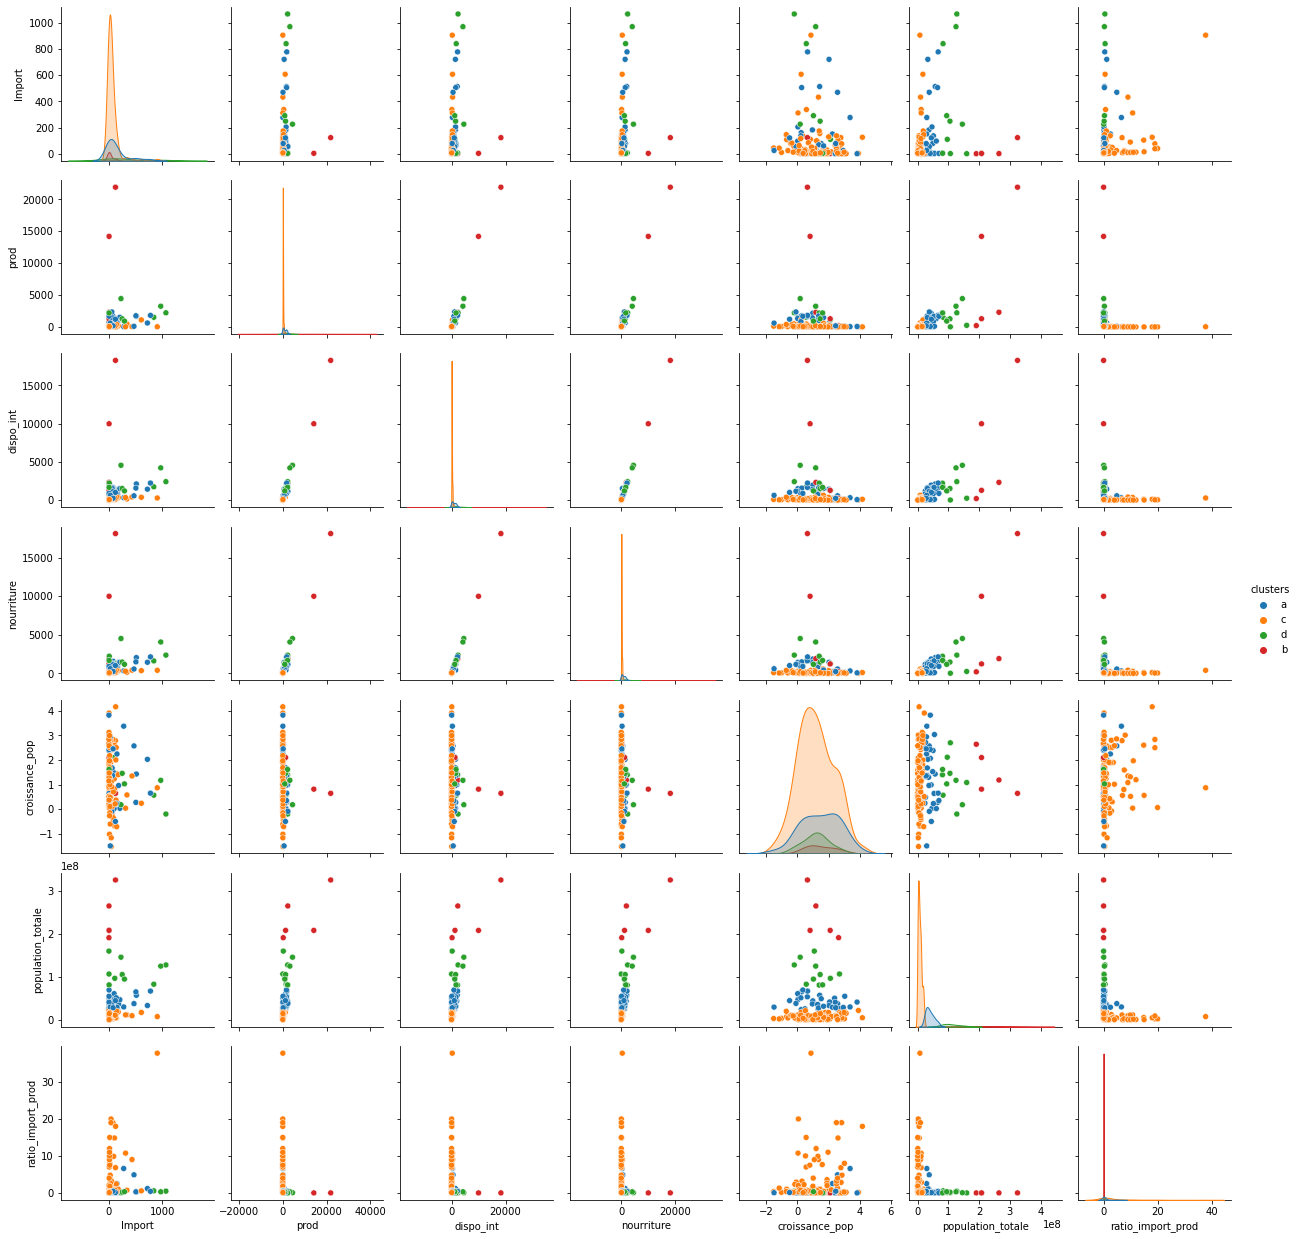

In [160]:
# on affiche les clusters de maniere graphique 
sns.pairplot(df_clusters1, hue="clusters")

# Classification hierachique 1

In [161]:
#On calcule les distances en spécifiant la méthode à utiliser
# on utilise la methode ward pour minimiser l'augmentation d'inertie intraclasse due au regroupement des 2 clusters.
Z1 = linkage(df_outlaw, method="ward")

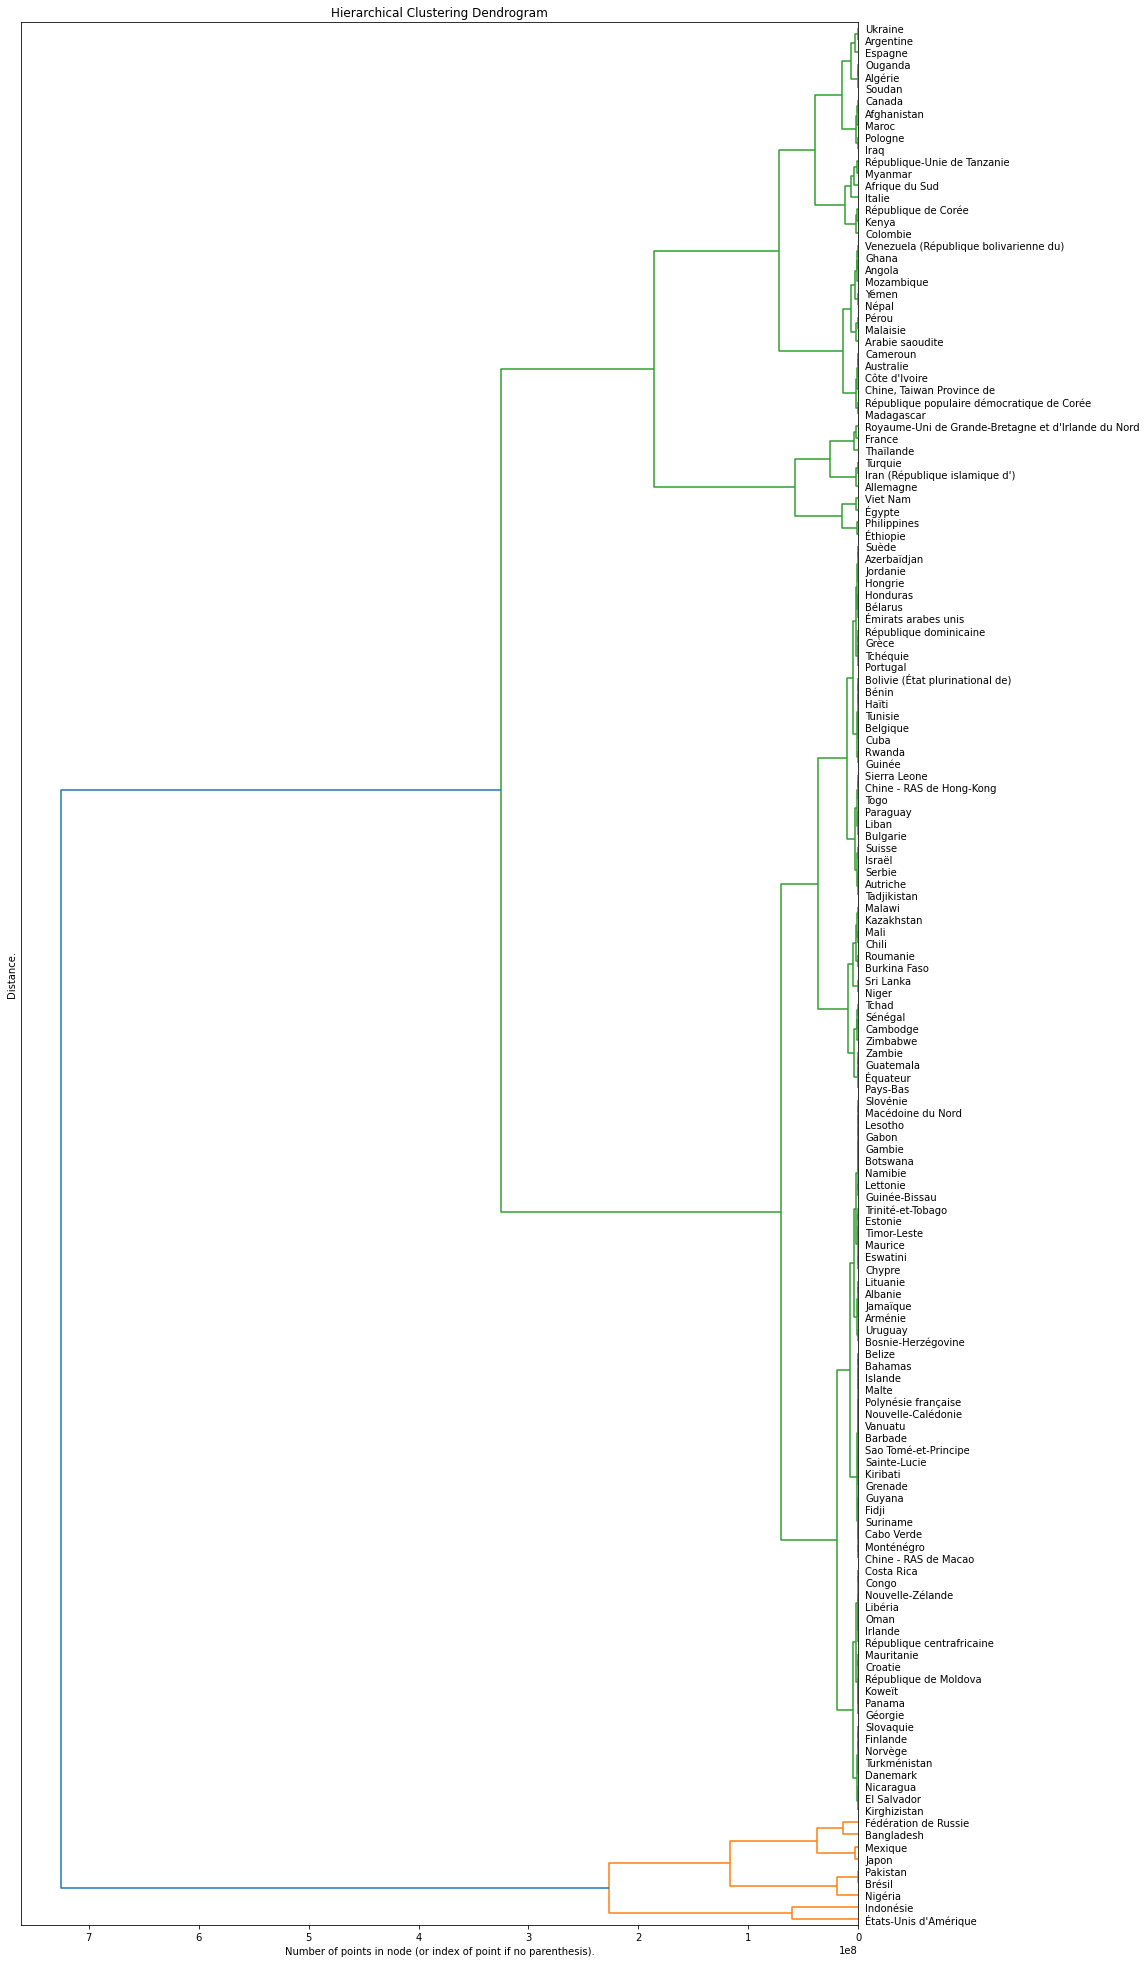

In [162]:
#on peut afficher le dendogramme : l'arbre qui regroupe les différents clusters.
fig, ax = plt.subplots(1, 1, figsize=(15, 35))

_ = dendrogram(Z1,labels=df_outlaw.index, ax=ax,orientation='left',leaf_font_size=10)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

## Synthese de l'analyse 

<AxesSubplot:>

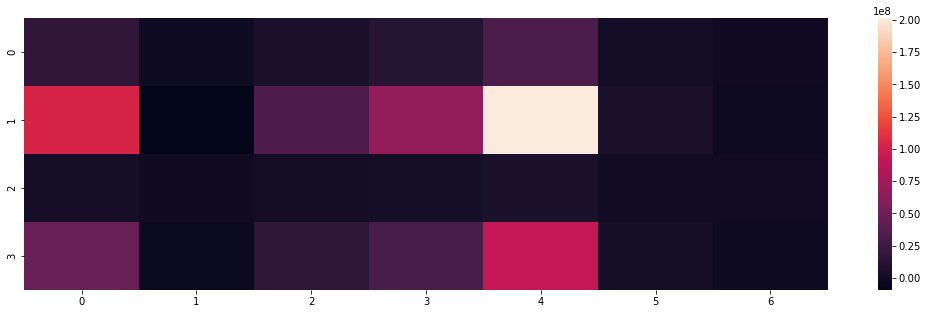

In [163]:
centroides1=kmeans1.cluster_centers_
centroides1_proj=pca1.transform(centroides1)
plt.figure(figsize=(18,5))
sns.heatmap(centroides1_proj)

In [164]:
df_clusters1.loc[df_clusters1.clusters=='b']

,Import,prod,dispo_int,nourriture,croissance_pop,population_totale,ratio_import_prod,clusters
Zone,,,,,,,,
Brésil,3.0,14201.0,9982.0,9982.0,0.810412,207833823.0,0.000211,b
États-Unis d'Amérique,123.0,21914.0,18266.0,18100.0,0.640452,325084756.0,0.005613,b
Indonésie,1.0,2301.0,2323.0,1904.0,1.183141,264650963.0,0.000435,b
Nigéria,0.0,201.0,202.0,192.0,2.641964,190873244.0,0.000000,b
Pakistan,2.0,1281.0,1282.0,1218.0,2.099311,207906209.0,0.001561,b


In [165]:
df_clusters1.loc[df_clusters1.clusters=='d']

,Import,prod,dispo_int,nourriture,croissance_pop,population_totale,ratio_import_prod,clusters
Zone,,,,,,,,
Allemagne,842.0,1514.0,1739.0,1609.0,0.565300,82658409.0,0.556143,d
Bangladesh,0.0,249.0,250.0,240.0,1.081341,159685424.0,0.000000,d
Égypte,110.0,1118.0,1250.0,1250.0,2.112843,96442591.0,0.098390,d
Éthiopie,1.0,14.0,14.0,14.0,2.699197,106399924.0,0.071429,d
Fédération de Russie,226.0,4444.0,4556.0,4509.0,0.175322,145530082.0,0.050855,d
Iran (République islamique d'),6.0,2174.0,2220.0,2220.0,1.394970,80673883.0,0.002760,d
Japon,1069.0,2215.0,2415.0,2359.0,-0.203924,127502725.0,0.482619,d
Mexique,972.0,3249.0,4219.0,4058.0,1.170768,124777324.0,0.299169,d
Philippines,249.0,1272.0,1521.0,1459.0,1.455772,105172925.0,0.195755,d


In [166]:
df_pays_sans_prod

,Import,prod,dispo_int,nourriture,croissance_pop,population_totale,ratio_import_prod
Zone,,,,,,,
Antigua-et-Barbuda,7.0,0.0,7.0,5.0,0.951051,95426.0,inf
Dominique,4.0,0.0,4.0,3.0,0.211760,71458.0,inf
Îles Salomon,6.0,0.0,3.0,3.0,2.680010,636039.0,inf
Luxembourg,11.0,0.0,11.0,11.0,2.183115,591910.0,inf
Mongolie,10.0,0.0,9.0,9.0,1.878768,3113786.0,inf
Saint-Kitts-et-Nevis,4.0,0.0,4.0,3.0,0.813559,52045.0,inf
Saint-Vincent-et-les Grenadines,9.0,0.0,8.0,8.0,0.336199,109827.0,inf
Samoa,17.0,0.0,15.0,13.0,0.419976,195352.0,inf
